# **String Matching Algorithm / Python libraries**
- String Matching with BERT, TF-IDF
- TheFuzz
- Jellyfish
- RapidFuzz
- Metaphone
- FuzzyWuzzy
- Levenshtein
- Distance
- Textdistance
- Py-StringMatching
- Difflib


# **String Matching with BERT, TF-IDF**

PolyFuzz: a framework for fuzzy string matching.

It is a collection of techniques that are used to find the best match between two sets of strings.

PolyFuzz performs fuzzy string matching, string grouping, and contains extensive evaluation functions. PolyFuzz is meant to bring fuzzy string matching techniques together within a single framework.


Currently, methods include a variety of edit distance measures, a character-based n-gram TF-IDF, word embedding techniques such as FastText and GloVe, and Huggingface transformers embeddings.



In [34]:
%pip install polyfuzz -q

In [ ]:
# You may want to install more depending on the transformers and language backends that you will be using. The possible installations are:

!pip install polyfuzz[sbert] -q
!pip install polyfuzz[flair] -q
!pip install polyfuzz[gensim] -q
!pip install polyfuzz[spacy] -q
!pip install polyfuzz[use] -q

# If you want to speed up the cosine similarity comparison and decrease memory usage when using embedding models, you can use sparse_dot_topn which is installed via:
!pip install polyfuzz[fast] -q

In [39]:
# two lists of strings, one list that we would like to map from, or correct,
# and one list to map to
from_list = ["apple", "apples", "appl", "recal", "house", "similarity"]
to_list = ["apple", "apples", "mouse"]

First compare the similarity of strings by using Levenshtein edit distance. It is a technique commonly used for comparing strings and calculates the number of changes one has to make to go from one string to another.

In [41]:
!pip install --upgrade urllib3 -q

In [40]:
# to instantiate PolyFuzz and specify EditDistance

from polyfuzz import PolyFuzz

model = PolyFuzz("EditDistance")
model.match(from_list, to_list)

The similarity column indicates how similar strings are to each other.

The implemented models make sure to normalize the score between 0 and 1 such that is easier to evaluate the results.

In [42]:
model.get_matches()

,From,To,Similarity
0,apple,apple,1.0
1,apples,apples,1.0
2,appl,apples,0.9
3,recal,apple,0.4
4,house,mouse,0.8
5,similarity,mouse,0.3


In [50]:
from polyfuzz import PolyFuzz
import polyfuzz

In [53]:
polyfuzz.models

<module 'polyfuzz.models' from '/usr/local/lib/python3.10/dist-packages/polyfuzz/models/__init__.py'>

In [56]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from polyfuzz import PolyFuzz



In [57]:
train_words = ["apple", "apples", "appl", "recal", "house", "similarity"]
unseen_words = ["apple", "apples", "mouse"]

# Fit
model = PolyFuzz("TF-IDF")
model.fit(train_words)

# Transform
results = model.transform(unseen_words)

In [58]:
# Save the model
model.save("my_model")


In [59]:

# Load the model
loaded_model = PolyFuzz.load("my_model")

In [63]:
# Please instantiate the model with one of the following methods:
# * 'TF-IDF'
# * 'EditDistance'
# * 'Embeddings'
# * Or None if you want to automatically use TF-IDF

loaded_model.group()
model.get_matches()

,From,To,Similarity
0,apple,apples,0.787
1,apples,apple,0.787
2,appl,apple,0.767
3,recal,None,0.000
4,house,None,0.000
5,similarity,None,0.000


In [64]:
loaded_model.group(link_min_similarity=0.75)
loaded_model.get_matches()

,From,To,Similarity,Group
0,apple,apples,0.787,apple
1,apples,apple,0.787,apple
2,appl,apple,0.767,apple
3,recal,None,0.000,None
4,house,None,0.000,None
5,similarity,None,0.000,None


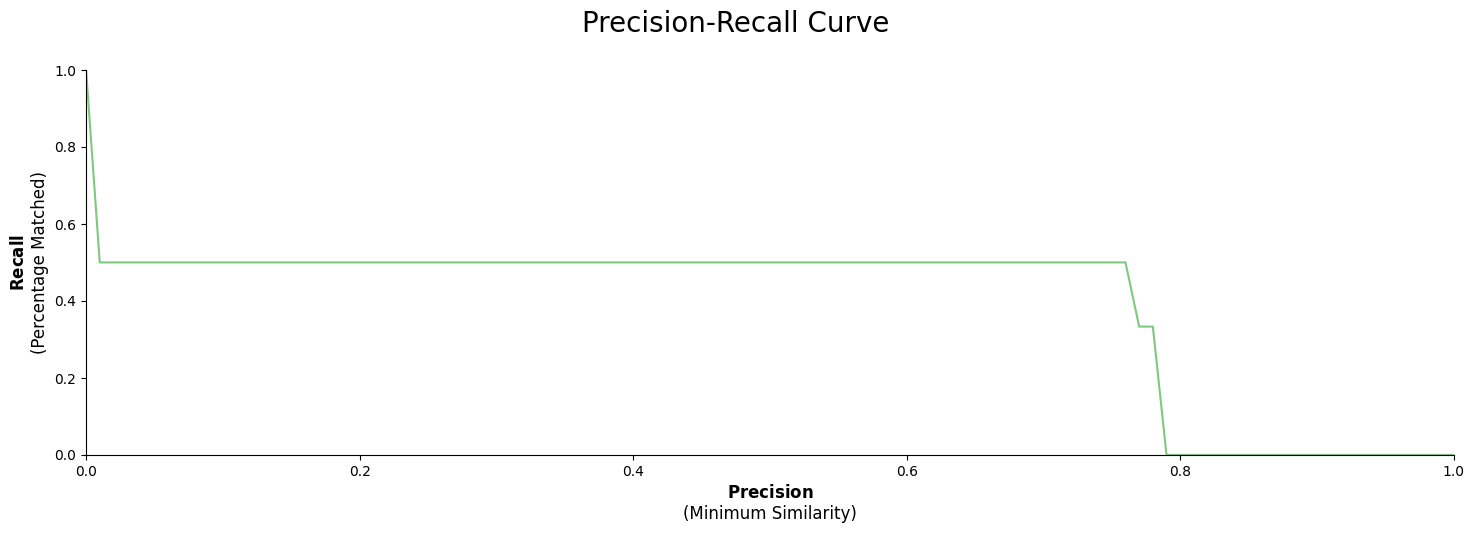

In [65]:
model.visualize_precision_recall()

## **Following models are implemented in PolyFuzz:**

- RapidFuzz
- EditDistance (you can use any distance measure, see documentation here)
- TF-IDF
- FastText and GloVe
- Huggingface Transformers

---
**RapidFuzz**

The most often used technique for calculating the edit distance between strings is Levenshtein. Although FuzzyWuzzy is one of the most commonly used implementations of Levenshtein, it has a GPL2 license which can be a bit restrictive in some cases.

---
**Edit Distance**

For those cases, PolyFuzz allows you to use the EditDistance model from polyfuzz.models to pass in any distance function. As long as that distance function takes in two strings and spits out a float, you can pass anything!

---

**TF-IDF**

A nifty trick for calculating the similarity between two strings is by applying TF-IDF not on the entire words, but on character n-grams to create vector representations. Then, we can use cosine similarity to calculate how similar strings are to each other and extract the best match!

---
**Embeddings**

With Flair, we can use all HuggingFace Transformers that are publicly available. We simply have to instantiate any Flair WordEmbedding method and pass it through PolyFuzzy. Then, we calculate the cosine similarity between the embeddings to extract the best match.

We need to import Embeddings from polyfuzz.models and import embeddings from the Flair package.

---

**Multiple Models**
One great feature of PolyFuzz is the ability to match, group, and visualize multiple models within a single PolyFuzz instance. This allows you to quickly compare models and decide for yourself which, or which combination, you are going to use.

---

In [ ]:
!pip install jellyfish -q

In [95]:
# In the example below, we are going to be using Jaro Winkler Similarity from the jellyfish package to create our custom scorer:

from polyfuzz import PolyFuzz
from polyfuzz.models import EditDistance
from jellyfish import jaro_winkler_similarity

jellyfish_matcher = EditDistance(scorer=jaro_winkler_similarity)
model = PolyFuzz(jellyfish_matcher)
model.match(from_list, to_list)


In [66]:
from polyfuzz.models import EditDistance, TFIDF, Embeddings
from flair.embeddings import TransformerWordEmbeddings


In [67]:
# to use BERT to embed the strings
# can use any of the WordEmbedding techniques implemented in Flair, such as FastText, GloVe, BERT, etc

embeddings = TransformerWordEmbeddings('bert-base-multilingual-cased')
bert = Embeddings(embeddings, min_similarity=0, model_id="BERT")

tfidf = TFIDF(min_similarity=0)

edit = EditDistance()

string_models = [bert, tfidf, edit]
model = PolyFuzz(string_models)



tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

In [68]:
model.match(from_list, to_list)

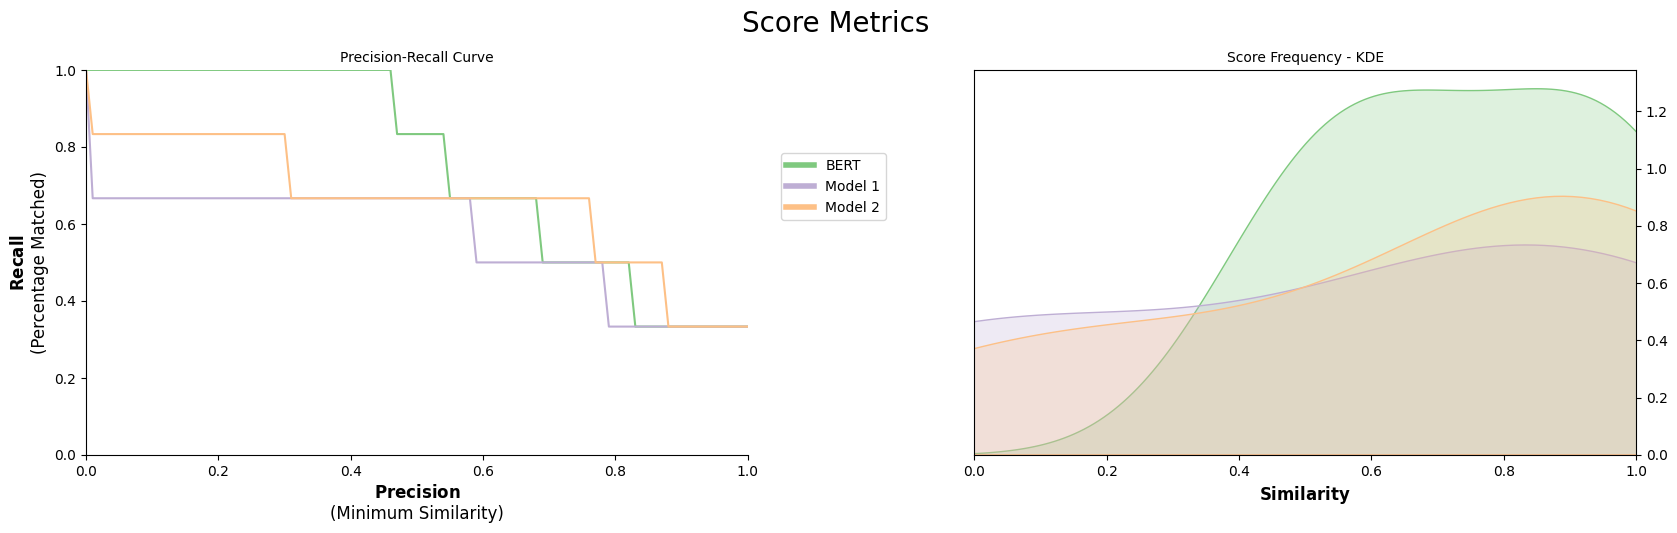

In [69]:
model.visualize_precision_recall(kde=True)

In [70]:
model.get_matches("BERT")

,From,To,Similarity
0,apple,apple,1.000
1,apples,apples,1.000
2,appl,apple,0.822
3,recal,apple,0.547
4,house,mouse,0.683
5,similarity,apples,0.468


Custom Grouper

In [72]:
model = PolyFuzz("TF-IDF")
model.match(from_list, to_list)
model.get_matches()

,From,To,Similarity
0,apple,apple,1.000
1,apples,apples,1.000
2,appl,apple,0.784
3,recal,None,0.000
4,house,mouse,0.588
5,similarity,None,0.000


In [73]:
edit_grouper = EditDistance(n_jobs=1)
model.group(edit_grouper)
model.get_matches()

,From,To,Similarity,Group
0,apple,apple,1.000,apples
1,apples,apples,1.000,apples
2,appl,apple,0.784,apples
3,recal,None,0.000,None
4,house,mouse,0.588,mouse
5,similarity,None,0.000,None


In [74]:
import numpy as np
import pandas as pd
from rapidfuzz import fuzz
from polyfuzz.models import BaseMatcher

In [77]:
class MyModel(BaseMatcher):
    def match(self, from_list, to_list, **kwargs):
        # Calculate distances
        matches = [[fuzz.ratio(from_string, to_string)/100 for to_string in to_list]
                    for from_string in from_list]

        # Get best matches
        mappings = [to_list[index] for index in np.argmax(matches, axis=1)]
        scores = np.max(matches, axis=1)

        # Prepare dataframe
        matches = pd.DataFrame({'From': from_list,'To': mappings, 'Similarity': scores})
        return matches

In [78]:
custom_model = MyModel()
model = PolyFuzz(custom_model)

In [80]:
model.match(from_list, to_list)
model.get_matches()

,From,To,Similarity
0,apple,apple,1.000000
1,apples,apples,1.000000
2,appl,apple,0.888889
3,recal,apple,0.400000
4,house,mouse,0.800000
5,similarity,apple,0.133333


# **TheFuzz**

Fuzzy string matching like a boss. It uses Levenshtein Distance to calculate the differences between sequences in a simple-to-use package.

In [81]:
!pip install thefuzz -q

In [103]:
!pip show thefuzz

Name: thefuzz
Version: 0.22.1
Summary: Fuzzy string matching in python
Home-page: https://github.com/seatgeek/thefuzz
Author: Adam Cohen
Author-email: adam@seatgeek.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: rapidfuzz
Required-by: 


In [82]:
from thefuzz import fuzz
from thefuzz import process

In [83]:
fuzz.ratio("this is a test", "this is a test!")

97

In [104]:
fuzz.partial_ratio("this is a test", "this is a test!#")

100

In [85]:
fuzz.ratio("fuzzy wuzzy was a bear", "wuzzy fuzzy was a bear")


91

In [86]:
fuzz.token_sort_ratio("fuzzy wuzzy was a bear", "wuzzy fuzzy was a bear")

100

In [87]:
fuzz.token_sort_ratio("fuzzy was a bear", "fuzzy fuzzy was a bear")

84

In [88]:
fuzz.token_set_ratio("fuzzy was a bear", "fuzzy fuzzy was a bear")

100

In [89]:
fuzz.partial_token_sort_ratio("fuzzy was a bear", "wuzzy fuzzy was a bear")

100

In [90]:
choices = ["Atlanta Falcons", "New York Jets", "New York Giants", "Dallas Cowboys"]
process.extract("new york jets", choices, limit=2)

[('New York Jets', 100), ('New York Giants', 79)]

In [91]:
process.extractOne("cowboys", choices)

('Dallas Cowboys', 90)

### Implementation in one of the project


In [92]:
import re
from thefuzz import fuzz
from thefuzz import process

In [98]:
def clean_text(sent):
    pattern = r"[A-Za-z\d\s]+"
    r1 = re.findall(pattern, sent)
    ctext = ''.join(r1).strip().lower()
    return ctext

def len_wise_token_match(text_to_match, med_name):
    ttm_len = len(text_to_match.split())

    # remove drug code (last in split)
    med_name_split = med_name.split()
    part_med_name = " ".join(med_name_split[:-1][:ttm_len])

    # clean both names
    ttm_clnd = clean_text(text_to_match)
    pmn_clnd = clean_text(part_med_name)

    return float(fuzz.token_set_ratio(ttm_clnd, pmn_clnd)/100.0)


In [99]:

text_to_match = "Pulmicort Udv 0.25mg/Ml"
text_From     = "Pulmicort Udv 0.25mg/Ml * 2ml"

len_wise_token_match(text_to_match, text_From )

1.0

In [105]:
def custom_scorer(qry, choice):
    tsr_score = fuzz.token_set_ratio(qry, choice)
    tsr_part_score = fuzz.partial_token_sort_ratio(qry, choice)
    fr_score = fuzz.ratio(qry, choice)
    fr_part_score = fuzz.partial_ratio(qry, choice)
    # thefuzz               0.19.0
    # sm_score = fuzz.SequenceMatcher(None, qry, choice).ratio() * 100
    #AttributeError: module 'thefuzz.fuzz' has no attribute 'SequenceMatcher'

    return round( np.mean([tsr_score, tsr_part_score, fr_score, fr_part_score]) )

def custom_text_matcher(text_to_match, text_From):
    # create dictionary - key -> code+tag and value -> text
    choices_dict = { 'First' : text_to_match }

    custom_score_matches = process.extractBests(text_to_match, choices_dict,\
                                                processor=lambda x:x.lower(),\
                                                    limit=25,\
                                                        score_cutoff=57,\
                                                            scorer=custom_scorer)
    return custom_score_matches

In [106]:

text_to_match = "Pulmicort Udv 0.25mg/Ml"
text_From     = "Pulmicort Udv 0.25mg/Ml * 2ml"

custom_text_matcher(text_to_match, text_From)

[('Pulmicort Udv 0.25mg/Ml', 100, 'First')]

# **Jellyfish**

Jellyfish is a python library that provides a variety of string comparison algorithms, including the Levenshtein Distance, Jaro-Winkler Distance, and Damerau-Levenshtein Distance. Advantages of Jellyfish include its flexibility and support for multiple algorithms. However, it may be fast as compared to other libraries when dealing with large amounts of data.

In [ ]:
!pip install jellyfish

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.1 MB/s eta 0:00:00


In [ ]:
import jellyfish as jf


In [ ]:
jf.levenshtein_distance('hello world','helloworld')

1

In [ ]:
jf.levenshtein_distance('Hello world','hello world')

1

In [ ]:
s1, s2 = 'Hello world','hello world'
s1, s2 = 'fish', 'ifsh'

In [ ]:


print( jf.levenshtein_distance(s1, s2)  )
print( jf.damerau_levenshtein_distance(s1, s2)  )

2
1


In [ ]:
s1, s2 = 'abc', 'abcd'

print( jf.levenshtein_distance(s1, s2)  )
print( jf.damerau_levenshtein_distance(s1, s2)  )
print( jf.hamming_distance(s1, s2)  )

1
1
1


In [ ]:
print( jf.jaro_similarity(s1, s2)  )
print( jf.jaro_winkler_similarity(s1, s2)  )

0.9166666666666666
0.9416666666666667


In [ ]:
s1, s2 = 'Hello world','hello world'
print( jf.jaro_similarity(s1, s2)  )
print( jf.jaro_winkler_similarity(s1, s2)  )

0.9393939393939394
0.9393939393939394


# **RapidFuzz**

### **RapidFuzz (a faster alternative to fuzzywuzzy)**

RapidFuzz is a Python library that offers fast and efficient string matching using various algorithms, including Levenshtein distance, Jaro, and Jaro-Winkler. RapidFuzz is designed for speed and optimised for large datasets, making it an excellent choice for scenarios where performance is critical.

### Advantages:
- High Performance: It outperforms many other libraries in terms of execution time, especially on large datasets.
- User-Friendly: RapidFuzz provides a straightforward API, making it accessible for developers of all experience levels.

### Disadvantages:
- Limited Phonetic Matching: Unlike Metaphone, RapidFuzz doesn't provide phonetic matching capabilities, so it may not be the best choice for certain applications that require pronunciation-based matching.

In [ ]:
!pip install rapidfuzz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.4 MB/s eta 0:00:00


In [ ]:
from rapidfuzz import fuzz

# Example strings
str1 = "kitten"
str2 = "sitting"

# Compute Levenshtein distance
# distance = fuzz.distance(str1, str2)
fuzz.partial_ratio("this is a test", "this is a test!")

# print(f"Levenshtein Distance: {distance}")

100.0

In [ ]:
fuzz.ratio(str1, str2)

61.53846153846154

In [ ]:
fuzz.ratio("fuzzy wuzzy was a bear", "wuzzy fuzzy was a bear")

90.9090909090909

In [ ]:
fuzz.partial_ratio(str1, str2)

66.66666666666667

In [ ]:
from rapidfuzz import fuzz
fuzz.token_sort_ratio("fuzzy was a bear", "fuzzy fuzzy was a bear")

84.21052631578947

In [ ]:
import utils

In [ ]:
fuzz.QRatio("this is a word", "THIS IS A WORD", processor=utils.default_process)

# **Metaphone**

Metaphone is a phonetic algorithm used for *indexing and comparing the phonetic pronunciation of words*. It primarily focuses on improving the accuracy of string matching in situations where traditional methods might fall short. Metaphone converts words into their phonetic representations, allowing you to match words based on their pronunciation, which can be crucial in applications like speech recognition or voice assistants.

### Advantages:
- Phonetic Search: Metaphone is excellent for phonetic searches where you want to retrieve words that sound similar but may be spelled differently.
- Language-Agnostic: It works across various languages, making it suitable for multilingual applications.

### Disadvantages:
Limited Semantic Understanding: Metaphone focuses on pronunciation, so it may not account for semantic meanings or contextual differences in words.

In [26]:
%pip install Metaphone -q

  Preparing metadata (setup.py) ... done


In [27]:
from metaphone import doublemetaphone

In [28]:
# Example words
word1 = "write"
word2 = "right"

# Compute Double Metaphone codes
code1 = doublemetaphone(word1)
code2 = doublemetaphone(word2)

print(f"Double Metaphone for '{word1}': {code1}")
print(f"Double Metaphone for '{word2}': {code2}")

Double Metaphone for 'write': ('RT', '')
Double Metaphone for 'right': ('RT', '')


# **FuzzyWuzzy**

FuzzyWuzzy is a python library that uses the Levenshtein Distance algorithm to calculate the similarity between two strings. It provides a simple and easy-to-use interface for string matching. Advantages of FuzzyWuzzy include its speed and the ability to handle large amounts of data. However, it may not be as accurate as other libraries when dealing with very similar strings.

In [4]:
%pip install fuzzywuzzy -q

In [5]:
from fuzzywuzzy import fuzz


In [6]:
fuzz.ratio('hello world','helloworld')

95

# **Levenshtein**

Levenshtein is a python library that uses the Levenshtein Distance algorithm to calculate the difference between two strings. Advantages of Levenshtein include its simplicity and speed. The only limitation is that it calculates levenshtein distance.

In [8]:
!pip install Levenshtein -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 13.4 MB/s eta 0:00:00


In [9]:
import Levenshtein


In [ ]:
Levenshtein.distance('hello world','helloworld')

# **Distance**

Distance is a python library that provides a variety of string comparison algorithms, including the Levenshtein Distance, Jaro-Winkler Distance, and Damerau-Levenshtein Distance. Advantages of Distance include its simplicity and support for multiple algorithms. However, it may not be as fast as other libraries when dealing with large amounts of data.

In [11]:
!pip install Distance -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [12]:
import distance


In [13]:
distance.levenshtein('hello world','helloworld')

1

In [14]:
distance.hamming("hamming", "hamning")

1

In [15]:
t1 = ("de", "ci", "si", "ve")
t2 = ("de", "ri", "si", "ve")
distance.levenshtein(t1, t2)

1

In [17]:
distance.sorensen("decide", "resize")

0.5555555555555556

In [16]:
distance.jaccard("decide", "resize")

0.7142857142857143

# **Textdistance**

Textdistance is a python library that provides a variety of string comparison algorithms, including the Levenshtein Distance, Jaro-Winkler Distance, and Damerau-Levenshtein Distance. Advantages of Textdistance include its flexibility and support for multiple algorithms. It's faster for large string comparison as comapred to other libraries. Also one thing to note is that it supports support for several languages and encodings.

In [19]:
%pip install textdistance -q

In [20]:
import textdistance

In [21]:
textdistance.levenshtein('hello world','helloworld')

1

In [22]:
textdistance.hamming('test', 'text')
# 1

textdistance.hamming.distance('test', 'text')
# 1

textdistance.hamming.similarity('test', 'text')
# 3

textdistance.hamming.normalized_distance('test', 'text')
# 0.25

textdistance.hamming.normalized_similarity('test', 'text')
# 0.75

textdistance.Hamming(qval=2).distance('test', 'text')
# 2

2

In [24]:
hamming = textdistance.Hamming(external=False)
hamming('text', 'textit')

2

# **Py-StringMatching**

Py-StringMatching is a comprehensive Python library designed to tackle a wide array of string matching and similarity measurement tasks. It covers an extensive range of string matching and similarity measures, making it a versatile choice for various use cases. It includes Jaccard, Cosine, Jaro-Winkler, Levenshtein, and more.

### Advantages:
- Wide Applicability: Py-StringMatching caters to diverse industries such as healthcare, finance, and e-commerce, making it an adaptable solution for a multitude of applications.
- Ease of Use: It is relatively easy to get started with Py-StringMatching, even for beginners in Python.

### Disadvantages:
- Performance: While Py-StringMatching is versatile, some specific string matching tasks might require more optimized libraries for better performance.

In [29]:
%pip install py-stringmatching -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.5/849.5 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [30]:
from py_stringmatching import Jaccard

# Initialize the Jaccard similarity measure
jaccard = Jaccard()

# Example strings
str1 = "apple banana orange"
str2 = "banana orange kiwi"

# Compute Jaccard similarity
similarity = jaccard.get_sim_score(str1.split(), str2.split())

print(f"Jaccard Similarity: {similarity}")

Jaccard Similarity: 0.5


# **Difflib**

Python's difflib library provides a versatile toolkit for string comparison, matching, and finding the differences between sequences.

Difflib stands out due to its focus on comparing sequences of strings or other iterable objects, making it a valuable tool for various tasks, including Sequence Matching (Ratcliff/Obershelp Algorithm) that can identify the longest contiguous matching subsequence between two sequences.

Another is Line Comparison particularly useful for comparing lines of text, making it a staple in applications like version control systems.

### Advantages:
- Built-In Python Standard Library: Being part of Python's standard library, difflib is readily available and requires no additional installation.
- Flexibility: You can customize comparison functions to suit specific requirements, making it versatile for various applications.
Unified and Context Diff Formats: difflib offers multiple output formats, including unified and context diff formats, allowing you to choose the most suitable format for your needs.
- Text Comparison: Its ability to compare text sequences is particularly useful for identifying differences in documents or code.

### Disadvantages:
- Limited to Sequence Comparison: It's primarily designed for comparing sequences, so it might not be the best choice for tasks that require more complex text analysis or natural language processing.
It provides several methods such as diff, get_close_matches, SequenceMatcher, and more.

In [31]:
import difflib

difflib to compare two code snippets line by line and highlight the differences, making it easy to identify what changed between the two versions.

In [33]:
# Example code snippets
code1 = '''def greet(name):
    return f"Hello, {name}!"'''

code2 = '''def great(name):
    return f"Hi, {name}!"'''

# Create a Differ object
differ = difflib.Differ()

# Compare the code snippets
diff = differ.compare(code1.splitlines(), code2.splitlines())

# Print the differences
print('\n'.join(diff))

- def greet(name):
?        ^

+ def great(name):
?        ^

-     return f"Hello, {name}!"
?               ^^^^

+     return f"Hi, {name}!"
?               ^

